<img src="https://raw.githubusercontent.com/vikrantkakad/Red-Wine-Quality-Analysis/master/img/header.png"/>

<img src="https://raw.githubusercontent.com/vikrantkakad/Red-Wine-Quality-Analysis/master/img/dataset.png"/>

### Setting up the development environment by importing required libraries and modules:
- *Numpy:* It will provide the support for efficient numerical computation.  
- *Pandas:* It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data operations.  
- *Matplotlib:* It provides a MATLAB-like plotting framework.  
- *Seaborn:* It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive statistical graphics.  
- *Bokeh:* It is a interactive visualization library that targets modern web browsers for presentation.  
- *Statsmodel:* It provides functions and classes for statistical tests and models.  
- *Sklearn:* It is python library for data mining, data analysis and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loading BokehJS ...

### Loading the <span style="color:red"> Red Wine </span> dataset

- Lets read the red wine data set from the *'UCI Machine Learning Repository'*.  
- Here, we can use the *read_csv()* from the *pandas* library to load data into dataframe from the remote url.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url)

- The *head(..)* function of *pandas* helps in viewing the preview of the dataset for n-number of rows
- The preview of data is messy and looks unformatted, as the red wine dataset seems to have data stored in *semi-colon (;)* format.  

In [3]:
wine.head(n=5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


- Lets reload the dataset by assigning the data separator explicitly to *read_csv()*.

In [4]:
wine = pd.read_csv(url, sep=";")
wine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploring the <span style="color:red">Red Wine</span> dataset:

In [5]:
print("Shape of Red Wine dataset: {s}").format(s = wine.shape)
print("Column headers/names: {s}").format(s = list(wine))

Shape of Red Wine dataset: (1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


- From above lines we can learn that there are total _1599 observations with 12 different feature variables/attributes_ present in the Red Wine dataset.

In [6]:
# Now, let's check the information about different variables/column from the dataset:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- We can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one _'quality'_ is an response variable.

In [7]:
# Let's look at the summary of the dataset,
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
- All the data seems to be in range (with different scales, which needs standardization).

- Let's look for the missing values in red wine dataset:

In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- The red wine dataset doesn't have any missing values/rows/cells for any of the variables/feature.
- It seems that data has been collected neatly or prior cleaning has been performed before publishing the dataset.

- Let's rename the modify the dataset headers/column names by removing the _'blank spaces'_ from it.

In [9]:
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Learning more about the target/response variable/feature:
- Let's check how many unique values does the target feature _'quality'_ has?

In [10]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

- And how data is distributed among those values?

In [11]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

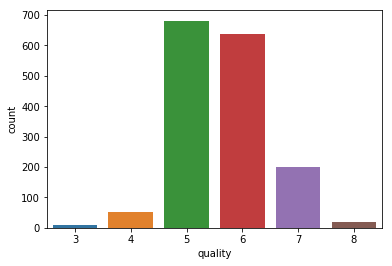

In [12]:
sns.countplot(x='quality', data=wine)

- The above distribution shows the range for response variable (_quality_) is between 3 to 8.

- Let's create a new discreet, categorical response variable/feature ('_rating_') from existing '_quality_' variable.  
_i.e._ bad: 1-4  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;average: 5-6  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;good: 7-10

In [13]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [14]:
wine.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


#### Corelation between features/variables:
- Let's check the corelation between the target variable and predictor variables,

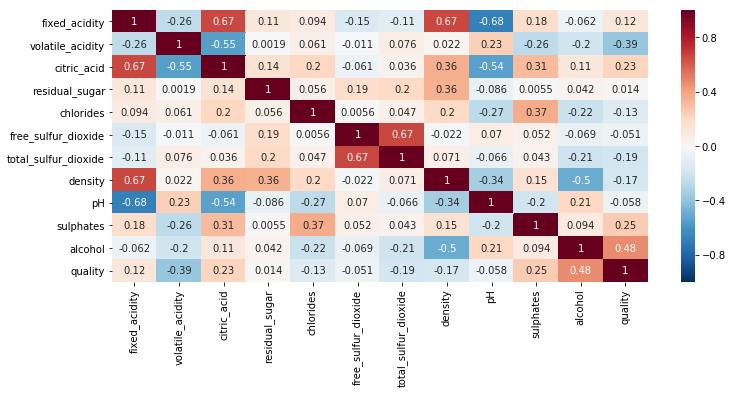

In [15]:
correlation = wine.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [16]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

- We can observe that, the *'alcohol, sulphates, citric_acid & fixed_acidity'* have maximum corelation with response variable '*quality*'. 
- This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis. 

#### Analysis of alcohol percentage with wine quality:

[Text(0,0.5,u'Alcohol Percent'),
 Text(0.5,0,u'Wine Quality'),
 Text(0.5,1,u'Alcohol percent in different wine quality types')]

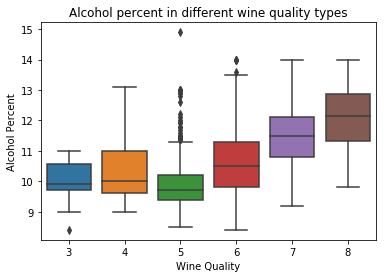

In [17]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

#### Analysis of sulphates & wine ratings:

[Text(0,0.5,u'Sulphates'),
 Text(0.5,0,u'Wine Ratings'),
 Text(0.5,1,u'Sulphates in different types of Wine ratings')]

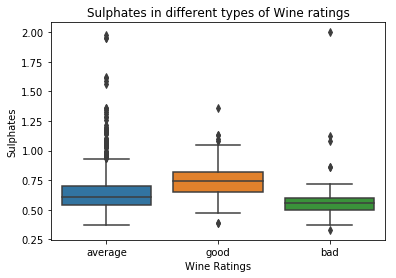

In [18]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

#### Analysis of Citric Acid & wine ratings:

[Text(0,0.5,u'Citric Acid'),
 Text(0.5,0,u'Wine Ratings'),
 Text(0.5,1,u'Xitric_acid in different types of Wine ratings')]

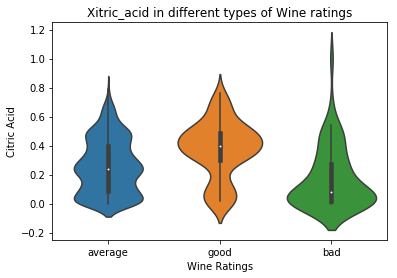

In [19]:
bx = sns.violinplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Xitric_acid in different types of Wine ratings')

#### Analysis of fixed acidity & wine ratings:

[Text(0,0.5,u'Fixed Acidity'),
 Text(0.5,0,u'Wine Ratings'),
 Text(0.5,1,u'Fixed Acidity in different types of Wine ratings')]

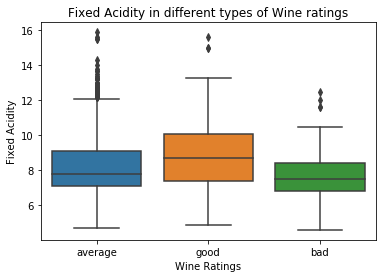

In [20]:
bx = sns.boxplot(x="rating", y='fixed_acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

#### Analysis of pH & wine ratings:

[Text(0,0.5,u'pH'),
 Text(0.5,0,u'Wine Ratings'),
 Text(0.5,1,u'pH in different types of Wine ratings')]

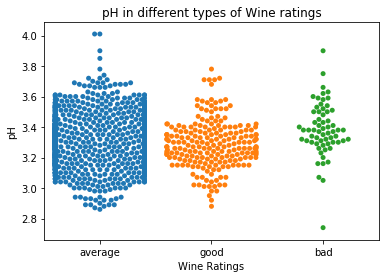

In [21]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

### Linear Regression:
- Below graphs for different quality ratings shows a linear regression between residual_sugar & alcohol in red wine,

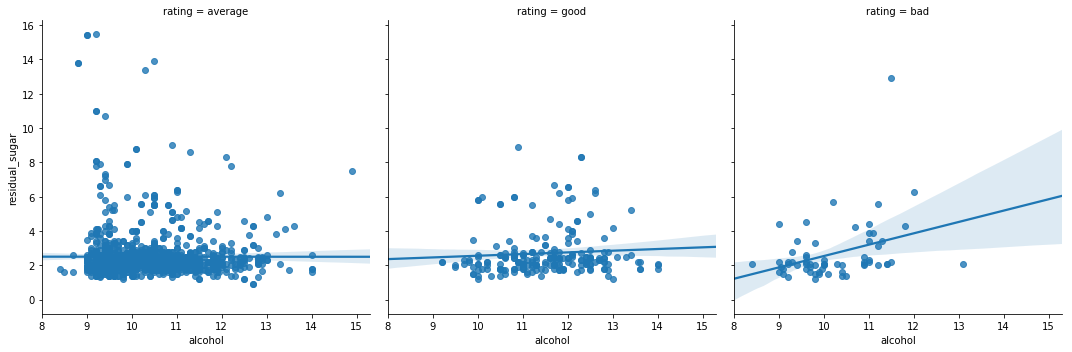

In [22]:
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

- The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.  
- We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.  
- This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.

In [23]:
y,X = dmatrices('quality ~ alcohol', data=wine, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

('X:', <class 'pandas.core.frame.DataFrame'>)
Index([u'Intercept', u'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sun, 20 May 2018   Prob (F-statistic):           2.83e-91
Time:                        23:12:40   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model = smf.OLS.from_formula('quality ~ alcohol', data = wine)
results = model.fit()
print(results.params)

Intercept    1.874975
alcohol      0.360842
dtype: float64


- The above wine quality vs alcohol content regression model's result shows that, the minimum value for quality is 1.87 and there will be increment by single unit for wine quality for every change of 0.360842 alcohol units.

### Classification
#### Classification using Statsmodel:
- We will use statsmodel for this logistic regression analysis of predicting good wine quality (>4).
- Let's create a new categorical variable/column (rate_code) with two possible values (good = 1 & bad = 0).

In [25]:
wine['rate_code'] = (wine['quality'] > 4).astype(np.float32)

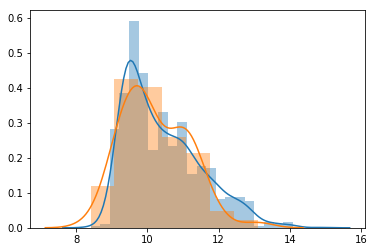

In [26]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

- The above plot shows the higher probability for red wine quality will be good if alcohol percentage is more than equal to 12, whereas the same probability reduces as alcohol percentage decreases.

In [27]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   8.0000  
Dependent Variable: rate_code        Pseudo R-squared: 0.005   
Date:               2018-05-20 23:12 AIC:              532.3386
No. Observations:   1599             BIC:              543.0928
Df Model:           1                Log-Likelihood:   -264.17 
Df Residuals:       1597             LL-Null:          -265.48 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

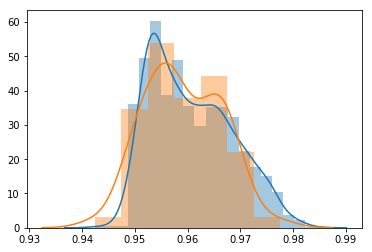

In [28]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [29]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.04      0.32      0.07        63
        1.0       0.96      0.69      0.80      1536

avg / total       0.92      0.67      0.77      1599



- The above distribution plot displays the overlapped outcomes for the good and bad quality plots of the red wine.
- We can observe that the precision for the good wine prediction is almost 96% accurate, where as for bad wine its only 4%, which is not good. But overall there is 92% average precision in wine quality rate prediction.

#### Classification using Sklearn's LogisticRegression:

In [30]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = wine)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        63
        1.0       0.96      1.00      0.98      1536

avg / total       0.92      0.96      0.94      1599



- The accuracy matrix for sklearn's linear regression model for red wine quality prediction shows the overall 92% precision which is similar to previous statsmodel's average precision.
- Also the precision for good wine (1) prediction is almost 96%.
- But the precision is almost 0% for the bad type of wine (0) with sklearn's linear regression model. Which is not a good sign for the analysis.

#### Classification using Sklearn's RandomForestClassifier:

In [31]:
y, X = dmatrices('rate_code ~ alcohol', data = wine)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       1.00      0.02      0.03        63
        1.0       0.96      1.00      0.98      1536

avg / total       0.96      0.96      0.94      1599



- Here, with the accuracy matrix for sklearn's random forest classifier model for the prediction of red wine quality, we can observe that the values have been improved significantly.
- The precision for the prediction of bad quality wine (0) is almost 100% where as the precision for prediction of good quality wine (1) is approximately 96%.
- This sklearn's random forest classifier model also has the overall precision around 96%, which is far better than the previous two models (i.e. statsmodel and sklearn's linear regression model)

### Conclusion
- We observed the key factors that determine and affects the quality of the red wine. Wine quality is ultimately a subjective measure. The ordered factor _'quality'_ was not very helpful and to overcome this, so we created another variable called _'rating'_.
- To make predictions of wine quality and any other if required, we trained two models. As seen, the statsmodel and sklearn's Linear Regression model along with Random Forest Classifier. The Random Forest Classifier performed marginally better and we decided to stick with it if we had to make any more predictions.
- The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.

<img src="https://raw.githubusercontent.com/vikrantkakad/Red-Wine-Quality-Analysis/master/img/thank_you.jpg"/>